# BHmax Parameterfitt

## Packages

In [8]:
import sys
sys.path.append('../datasets') 
import dataset_long as dsl

sys.path.append('../fitting') 
import paramfitt_singlePatient as pf 

# Model
import numpy as np
import tellurium as te
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Dataframe
import pandas as pd

#Estimation

from scipy.optimize import minimize 
from collections import OrderedDict
from scipy.stats import qmc
from scipy.optimize import basinhopping
#Analyse Estimation
from scipy.stats import chi2
from scipy.stats import norm

# Save optimization params
import json
import time

## BHmax Paramscan - Close Up 

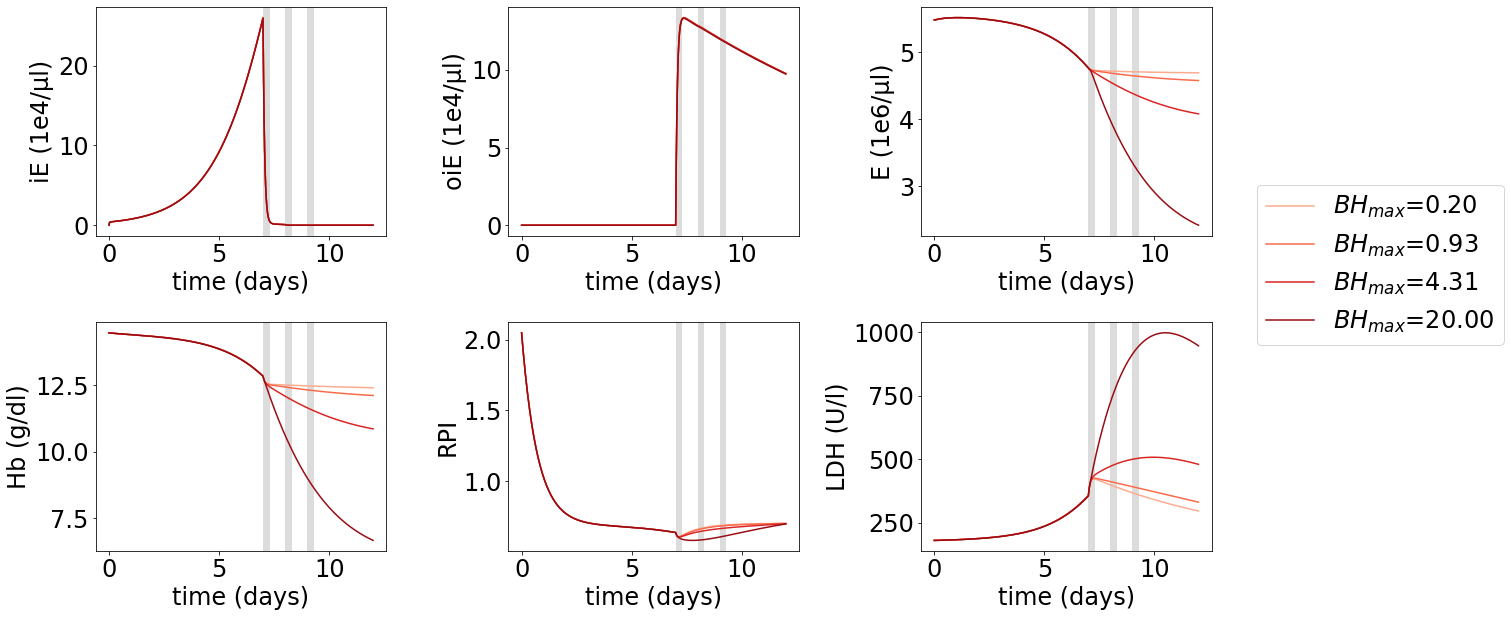

[<matplotlib.lines.Line2D object at 0x7fc3853f3a90>, <matplotlib.lines.Line2D object at 0x7fc3853f1420>, <matplotlib.lines.Line2D object at 0x7fc3852fc340>, <matplotlib.lines.Line2D object at 0x7fc385441e10>] ['$BH_{max}$=0.20', '$BH_{max}$=0.93', '$BH_{max}$=4.31', '$BH_{max}$=20.00']


In [9]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.38, wspace= 0.42)
size_of_font = 24

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3
MAX = {}
MIN = {}

for i, (param, values) in enumerate(param_values.items()):
    p_max = {}
    p_min = {}

    for idx, value in enumerate(values):
        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 12, 500, ['time']+list(species_to_analyze.keys()))
        p_max[10**value] = np.max(result["RPI"])
        p_min[10**value] = np.min(result["RPI"])


        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3


            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$BH_{{max}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)',fontsize= size_of_font)
            axs[row][col].set_ylabel(species_to_analyze[specie][0],fontsize= size_of_font)
            axs[row, col].tick_params(labelsize=size_of_font)

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
    MAX[param] = p_max
    MIN[param] = p_min

axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(3.0, 0.85),fontsize= size_of_font) #bbox (nach rechts-links, oben-unten, negativ yes)


plt.savefig("./figures/paramscan_BHmax_short.pdf", format="pdf",bbox_inches='tight')

plt.show()

print(handles, labels)

#plt.savefig("plot.pdf")

## BHmax Paramscan - long term

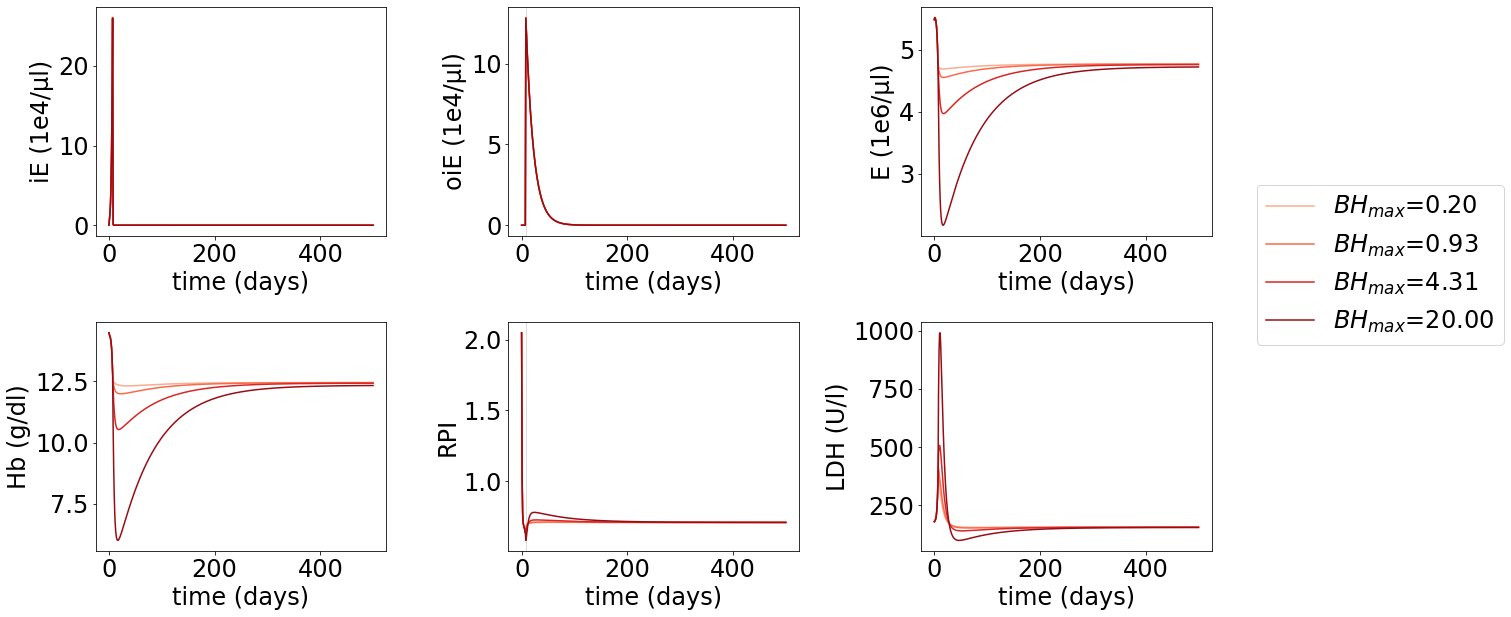

[<matplotlib.lines.Line2D object at 0x7fc3850bf250>, <matplotlib.lines.Line2D object at 0x7fc3850f2890>, <matplotlib.lines.Line2D object at 0x7fc385131db0>, <matplotlib.lines.Line2D object at 0x7fc384f6d1b0>] ['$BH_{max}$=0.20', '$BH_{max}$=0.93', '$BH_{max}$=4.31', '$BH_{max}$=20.00']


In [10]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.38, wspace= 0.42)
size_of_font = 24

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3
MAX = {}
MIN = {}

for i, (param, values) in enumerate(param_values.items()):
    p_max = {}
    p_min = {}

    for idx, value in enumerate(values):
        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 500, 501, ['time']+list(species_to_analyze.keys()))
        p_max[10**value] = np.max(result["RPI"])
        p_min[10**value] = np.min(result["RPI"])


        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3


            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$BH_{{max}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)',fontsize= size_of_font)
            axs[row][col].set_ylabel(species_to_analyze[specie][0],fontsize= size_of_font)
            axs[row, col].tick_params(labelsize=size_of_font)

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
    MAX[param] = p_max
    MIN[param] = p_min

axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(3.0, 0.85),fontsize= size_of_font) #bbox (nach rechts-links, oben-unten, negativ yes)


plt.savefig("./figures/paramscan_BHmax_long.pdf", format="pdf",bbox_inches='tight')

plt.show()

print(handles, labels)

#plt.savefig("plot.pdf")

## BHmax Paramscan - normal

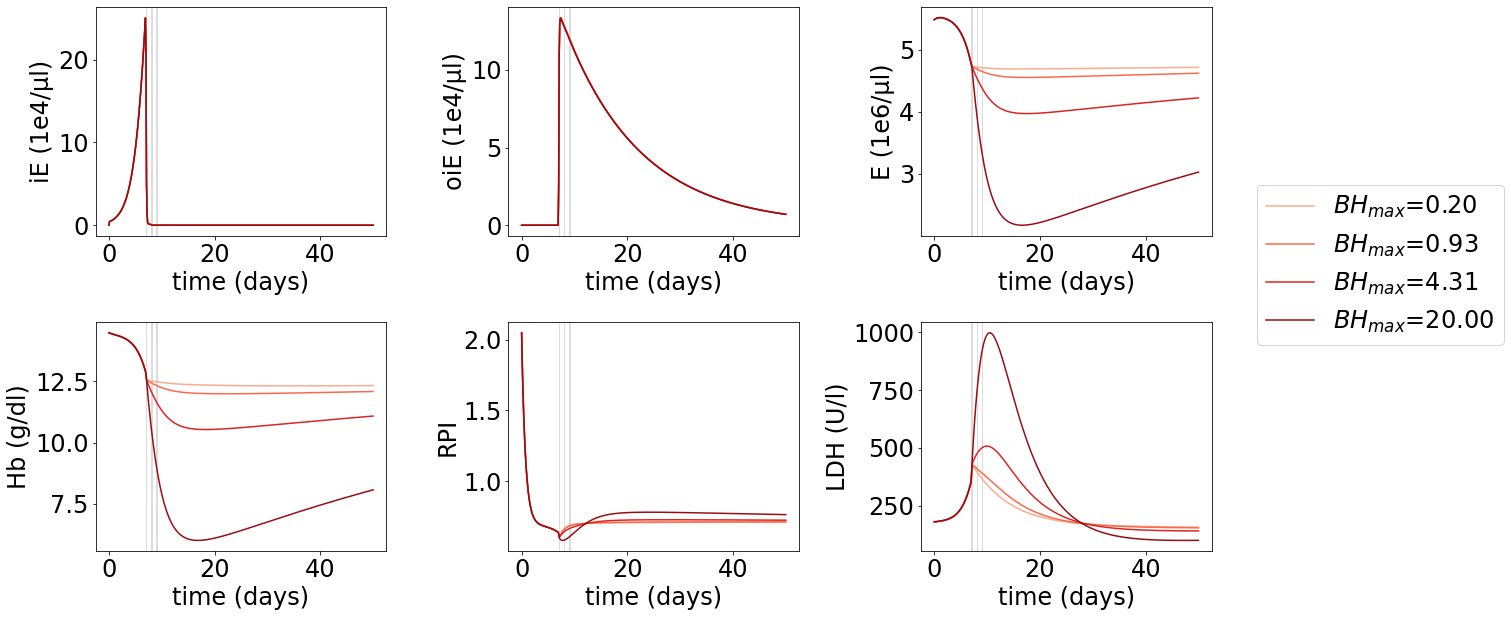

[<matplotlib.lines.Line2D object at 0x7fc38fb54f40>, <matplotlib.lines.Line2D object at 0x7fc3901c43a0>, <matplotlib.lines.Line2D object at 0x7fc3871a2ef0>, <matplotlib.lines.Line2D object at 0x7fc38fce3070>] ['$BH_{max}$=0.20', '$BH_{max}$=0.93', '$BH_{max}$=4.31', '$BH_{max}$=20.00']


In [11]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.38, wspace= 0.42)
size_of_font = 24

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3
MAX = {}
MIN = {}

for i, (param, values) in enumerate(param_values.items()):
    p_max = {}
    p_min = {}

    for idx, value in enumerate(values):
        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 50, 500, ['time']+list(species_to_analyze.keys()))
        p_max[10**value] = np.max(result["RPI"])
        p_min[10**value] = np.min(result["RPI"])


        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3


            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$BH_{{max}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)',fontsize= size_of_font)
            axs[row][col].set_ylabel(species_to_analyze[specie][0],fontsize= size_of_font)
            axs[row, col].tick_params(labelsize=size_of_font)

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
    MAX[param] = p_max
    MIN[param] = p_min

axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(3.0, 0.85),fontsize= size_of_font) #bbox (nach rechts-links, oben-unten, negativ yes)


plt.savefig("./figures/paramscan_BHmax.pdf", format="pdf",bbox_inches='tight')

plt.show()

print(handles, labels)

#plt.savefig("plot.pdf")

## BHmax Paramscan - PADH check, LDH&Hb %change

[<matplotlib.lines.Line2D object at 0x7fc387214340>, <matplotlib.lines.Line2D object at 0x7fc385688190>, <matplotlib.lines.Line2D object at 0x7fc38574a320>, <matplotlib.lines.Line2D object at 0x7fc38fdce500>, <matplotlib.lines.Line2D object at 0x7fc38fc8bc10>, <matplotlib.lines.Line2D object at 0x7fc38707fa90>, <matplotlib.lines.Line2D object at 0x7fc38fdb31c0>, <matplotlib.lines.Line2D object at 0x7fc38fccd9f0>, <matplotlib.lines.Line2D object at 0x7fc387049480>, <matplotlib.lines.Line2D object at 0x7fc38710ac80>, <matplotlib.lines.Line2D object at 0x7fc387046a40>, <matplotlib.lines.Line2D object at 0x7fc386f839a0>, <matplotlib.lines.Line2D object at 0x7fc38fd8cdc0>, <matplotlib.lines.Line2D object at 0x7fc3856347f0>, <matplotlib.lines.Line2D object at 0x7fc3871bd720>, <matplotlib.lines.Line2D object at 0x7fc38fcd8100>, <matplotlib.lines.Line2D object at 0x7fc385261e40>, <matplotlib.lines.Line2D object at 0x7fc3871852d0>, <matplotlib.lines.Line2D object at 0x7fc387185e40>, <matplotlib

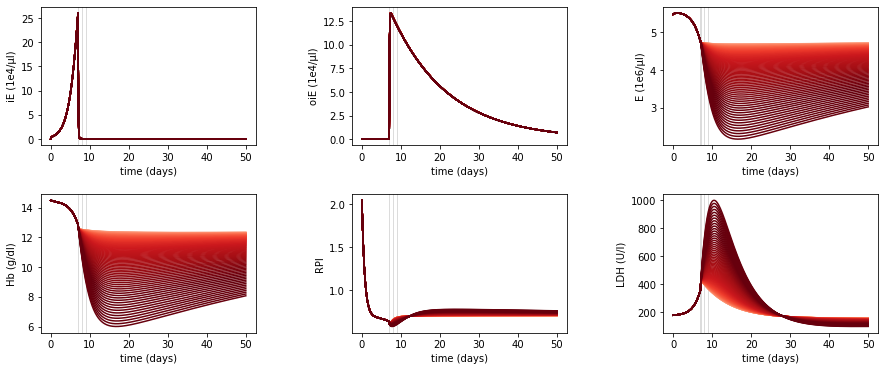

In [12]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 100

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.35, wspace= 0.45)

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3
df_list = []


def speciesvalue_tadd(species, t_add = None,**kwargs):
    return species[t_add]

def species_max(species,**kwargs):
    return np.max(species)

def species_max_PADH(species, t_PADH = None,**kwargs):
    return np.max(species[t_PADH:])

def species_min(species,**kwargs):
    return np.min(species)

def species_min_PADH(species, t_PADH = None,**kwargs):
    return np.min(species[t_PADH:])


readouts = {
    "max":species_max,
    "max_padh":species_max_PADH,
    "min":species_min,
    "min_padh":species_min_PADH,
    "ref_value": speciesvalue_tadd,
}
for i, (param, values) in enumerate(param_values.items()):
   

    for idx, param_value in enumerate( values):
        model = te.loada('.././model/OIE_model.ant')

        
        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**param_value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str)
        t_start = 0
        t_end = 50
        n_steps = 500+1 

        result = model.simulate(t_start, t_end, n_steps, ['time']+list(species_to_analyze.keys()))
        t_add = int(np.floor(n_steps/(t_end - t_start) * model.t_ART_add))
        t_PADH = int(np.floor(n_steps/(t_end - t_start) * (model.t_ART_add+8)))


        for k in species_to_analyze.keys():
            for rn,f in readouts.items():
                df_list.append({
                    "readout_name":rn,
                    "parameter_value":10**param_value,
                    "exponent":param_value,
                    "parameter_name":param,
                    "species_name":k,
                    "value":f(result[k],t_add = t_add, t_PADH = t_PADH)
                
                })


        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3

            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'{param}={round(10**param_value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)')
            axs[row][col].set_ylabel(species_to_analyze[specie][0])

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
   

#axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.9),) #bbox (nach rechts-links, oben-unten, negativ yes)
#plt.show()

print(handles, labels)

In [13]:
df = pd.DataFrame(df_list)

mdf = df.pivot_table(values = ["value"], columns= ["readout_name","parameter_name","species_name",], index = 'parameter_value')
mdf = mdf.droplevel(level = [0],axis = 1)

def norm(df, ref_value):
    df =  ((df.droplevel(level = 0,axis = 1) - ref_value)/ref_value)*100
    return df


mdf2 = mdf.loc[:,(slice(None),slice(None),["Hb","LDH"],)]
mdf2 = mdf2.groupby(level = [0],axis = 1).apply(norm, mdf2.loc[:, ("ref_value",)])
df = mdf2.melt(ignore_index = False)
df["parameter_value"] = df.index
df.index = pd.RangeIndex(len(df))

df = df.loc[
    ((df["species_name"] == "Hb") & (df["readout_name"] == "min_padh"))|
    ((df["species_name"] == "LDH") & (df["readout_name"] == "max_padh"))
]


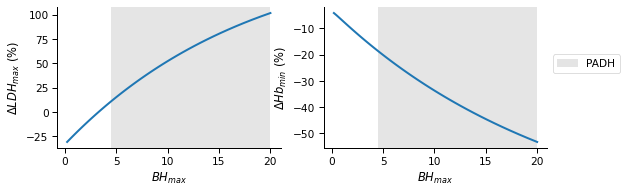

In [14]:
sns.set_context("paper",font_scale=1.2,rc = {"lines.linewidth": 2})
g = sns.FacetGrid(col = "species_name", data=df,sharey=False,height=3,aspect=1.3)
g.map_dataframe(sns.lineplot,x = 'parameter_value', y = "value")
g.add_legend(title = "Readout")


ax = g.axes
ax[0][0].set_ylabel("$\Delta LDH_{max}$ (%)")
ax[0][1].set_ylabel("$\Delta Hb_{min}$ (%)")

ax[0][0].set_title("")
ax[0][1].set_title("")

for a in ax[0]:
    a.set_xlabel("$BH_{max}$")
ldh = df.pivot(columns = ["species_name","readout_name"] , index= "parameter_value", values ="value")
padh_limit = ldh[(ldh[("LDH","max_padh")] >= 10) & (ldh[("Hb","min_padh")] <= -10)].index.min()

for a in np.ravel(ax):
    h = a.axvspan(padh_limit,20, alpha=0.2, linewidth=0, color = "tab:grey", zorder = -1)

handles, labels = a.get_legend_handles_labels()
g.legend.remove()
handles.append(h)
labels.append("PADH")
a.legend(handles = handles,labels = labels, bbox_to_anchor = (1, 0.7))

plt.savefig("./figures/paramscan_BHmax_PADHcheck.pdf", format="pdf",bbox_inches='tight')

plt.show()

## BH Parameter Analyse

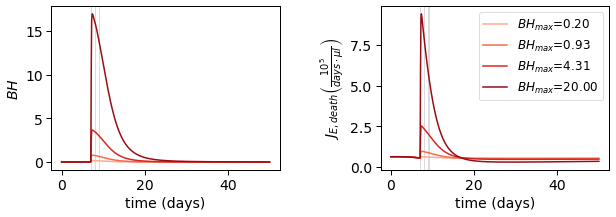

In [16]:
species_to_analyze = OrderedDict({
    'k_BH_max': ['k_BH_max  einheit', 1],
    'J_E_death':['J_E_death (1/day)', 1e5]
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Adjust figure size for paper
fig, axs = plt.subplots(1,2, figsize=(10,3)) #
fig.subplots_adjust(hspace=0.38, wspace=0.44)

# Adjust font size for paper
size_of_font = 14

cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3

for i, (param, values) in enumerate(param_values.items()):
    for idx, value in enumerate(values):

        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 50, 500, ['time']+list(species_to_analyze.keys()))
        
        for j, specie in enumerate(species_to_analyze.keys()):
            col = j % 2

            axs[col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$BH_{{max}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (0.8 / num_values_per_param)), linewidth=1.5)
            axs[col].set_xlabel('time (days)',fontsize=size_of_font)

            axs[0].set_ylabel( '$BH$',fontsize=size_of_font)
            axs[1].set_ylabel(r'$J_{{E,death}} \left( \frac{ 10^5}{days \cdot \mu l} \right)$', fontsize=size_of_font)


            axs[col].tick_params(labelsize=size_of_font)
            axs[col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=1.2)
            axs[col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=1.2)
            axs[col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=1.2)

        handles, labels = axs[col].get_legend_handles_labels()
        
# Adjusted legend position and size
axs[1].legend(handles, labels, loc='upper right', fontsize=size_of_font - 2)

# Save the figure in high resolution for paper
plt.savefig("./figures/paramscan_BHmax_BHrates.pdf", format="pdf", dpi=200, bbox_inches='tight')
plt.show()
